In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


# Inspecting Data

In [5]:
city_data_df.info() #to me info does the same as getting dtypes/isnull().sum()

# Get the columns and the rows that are not null.
#city_data_df.isnull().sum()

# Get the data types of each column.
#city_data_df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          120 non-null    object
 1   driver_count  120 non-null    int64 
 2   type          120 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.9+ KB


In [6]:
# Get the unique values of the type of city.
city_data_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [7]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Rural")

18

In [8]:
#get the columns and rows that are not null
ride_data_df.info()

#code provided:
# Get the columns and the rows that are not null.
#ride_data_df.count()

# Get the columns and the rows that are not null.
#ride_data_df.isnull().sum()

# Get the data types of each column.
#ride_data_df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   city     2375 non-null   object 
 1   date     2375 non-null   object 
 2   fare     2375 non-null   float64
 3   ride_id  2375 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 74.3+ KB


In [9]:
#create new and merge DFs
pyber_data_df = pd.merge(ride_data_df, city_data_df, how='left', on=["city", "city"])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


# Creating additional data & views

In [10]:
#create Urban city DF
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [11]:
#create suburban city DF
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [12]:
#create rural city DF
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [13]:
# Get the number of rides for urban cities.
#create a series of data - stored in a data frame
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

#urban_ride_count.head()
#suburban_ride_count.head()
#rural_ride_count.head()

In [19]:
#get city type average fares by city
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [20]:
#get avg number of drivers for each city in each city type
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

# Create Bubble Chart

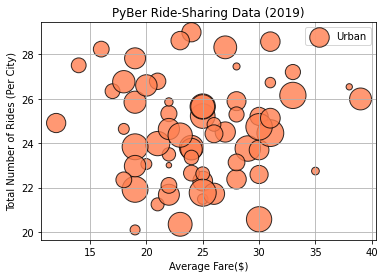

In [16]:
#MATLAB method
#build scatter plot for urban cities
plt.scatter(urban_ride_count, urban_avg_fare, 
            label="Urban", s=10*urban_driver_count,
            color="coral", edgecolor="black", linewidths=1, alpha=0.8)

#adding titles, labels
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Average Fare($)")
plt.ylabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

plt.show()

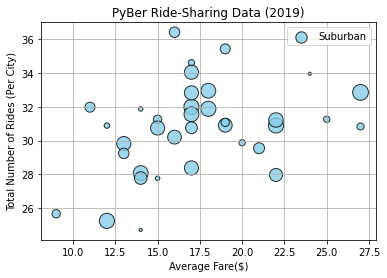

In [17]:
#build scatter plot for suburban cities
plt.scatter(suburban_ride_count, suburban_avg_fare, 
            label="Suburban", s=10*suburban_driver_count,
            color="skyblue", edgecolor="black", linewidths=1, alpha=0.8)

#adding titles, labels
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Average Fare($)")
plt.ylabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

plt.show()

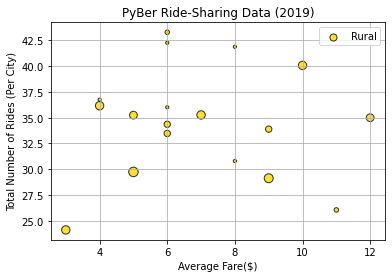

In [21]:
#build scatter plot for rural cities
plt.scatter(rural_ride_count, rural_avg_fare, 
            label="Rural", s=10*rural_driver_count,
            color="gold", edgecolor="black", linewidths=1, alpha=0.8)

#adding titles, labels
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Average Fare($)")
plt.ylabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

plt.show()

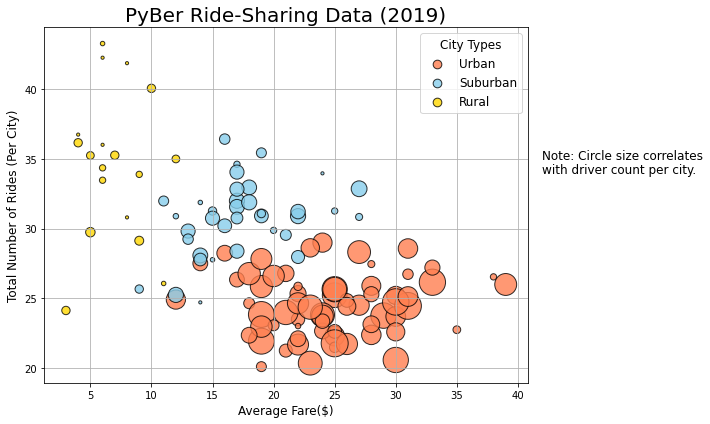

In [38]:
#combining the scatter charts
plt.subplots(figsize=(10, 6))

#urban cities scatter
plt.scatter(urban_ride_count, urban_avg_fare, 
            label="Urban", s=10*urban_driver_count,
            color="coral", edgecolor="black", linewidths=1, alpha=0.8)

#suburban cities scatter
plt.scatter(suburban_ride_count, suburban_avg_fare, 
            label="Suburban", s=10*suburban_driver_count,
            color="skyblue", edgecolor="black", linewidths=1, alpha=0.8)

#rural cities scatter
plt.scatter(rural_ride_count, rural_avg_fare, 
            label="Rural", s=10*rural_driver_count,
            color="gold", edgecolor="black", linewidths=1, alpha=0.8)

#adding title, legend
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.xlabel("Average Fare($)", fontsize=12)
plt.ylabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

#creating legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
                 scatterpoints=1, loc="best", title="City Types")
#resizing legend markers
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

plt.text(42,35, "Note: Circle size correlates", fontsize="12")
plt.text(42,34, "with driver count per city.", fontsize="12")
#save the figure
plt.tight_layout()
plt.savefig("analysis/Fig1.png")
#plt.show()